In [4]:
# Step 1: Import libary yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Step 2: Load dataset
data = pd.read_csv('/content/FinancialMarket.csv')

In [6]:
# Menampilkan beberapa baris pertama dari dataset
print("Dataset FinancialMarket:")
print(data.head())

Dataset FinancialMarket:
         x  combined_data
0  0.00000       0.003073
1  0.01001       0.033492
2  0.02002      -0.027269
3  0.03003       0.176319
4  0.04004      -0.006027


In [7]:
# Step 3: Memisahkan fitur dan target
# Asumsikan kolom terakhir adalah target, dan yang lainnya adalah fitur
X = data.iloc[:, :-1]  # Semua kolom kecuali yang terakhir
y = data.iloc[:, -1]   # Kolom terakhir sebagai target

# Membagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Step 4: Regresi Linear Biasa
# Membuat model regresi linear
linear_model = LinearRegression()

# Melatih model dengan data training
linear_model.fit(X_train, y_train)

# Memprediksi data testing
y_pred_linear = linear_model.predict(X_test)

# Menghitung performa model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("\nRegresi Linear Biasa:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared: {r2_linear}")


Regresi Linear Biasa:
Mean Squared Error: 9.401377787555104
R-squared: 0.6781603066194921


In [9]:
# Step 5: Regresi Linear dengan Basis Fungsi (Polynomial Regression)
# Menggunakan PolynomialFeatures untuk membuat fitur berbasis fungsi
poly = PolynomialFeatures(degree=2)  # Menggunakan derajat 2 sebagai contoh

# Transformasi fitur menjadi basis fungsi polinomial
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Membuat model regresi linear dengan basis fungsi
poly_model = LinearRegression()

# Melatih model dengan data training berbasis fungsi
poly_model.fit(X_train_poly, y_train)

# Memprediksi data testing
y_pred_poly = poly_model.predict(X_test_poly)

# Menghitung performa model berbasis fungsi
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("\nRegresi Linear dengan Basis Fungsi:")
print(f"Mean Squared Error: {mse_poly}")
print(f"R-squared: {r2_poly}")


Regresi Linear dengan Basis Fungsi:
Mean Squared Error: 1.3480931930431028
R-squared: 0.9538503919636472


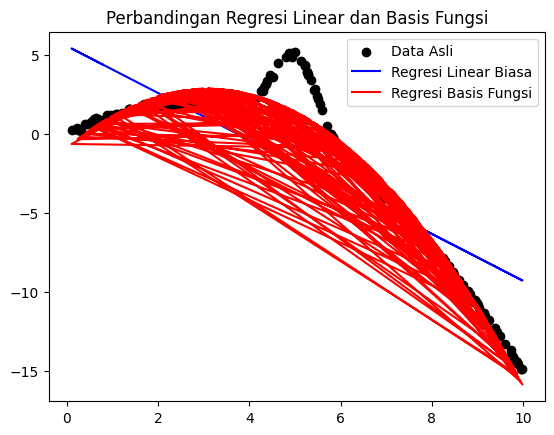


Kesimpulan:
1. Model regresi linear biasa memiliki Mean Squared Error (MSE) sebesar 9.401377787555104 dan R-squared sebesar 0.6781603066194921
2. Model regresi dengan basis fungsi memiliki Mean Squared Error (MSE) sebesar 1.3480931930431028 dan R-squared sebesar 0.9538503919636472
3. Hasil menunjukkan bahwa model dengan basis fungsi lebih kompleks dan mungkin lebih baik jika data tidak linear, tetapi hal ini perlu dievaluasi berdasarkan performa model.


In [10]:
# Step 6: Visualisasi Hasil (Opsional, jika hanya ada satu fitur)
if X.shape[1] == 1:
    plt.scatter(X_test, y_test, color='black', label='Data Asli')
    plt.plot(X_test, y_pred_linear, color='blue', label='Regresi Linear Biasa')
    plt.plot(X_test, y_pred_poly, color='red', label='Regresi Basis Fungsi')
    plt.legend()
    plt.title('Perbandingan Regresi Linear dan Basis Fungsi')
    plt.show()

# Step 7: Kesimpulan
print("\nKesimpulan:")
print("1. Model regresi linear biasa memiliki Mean Squared Error (MSE) sebesar", mse_linear, "dan R-squared sebesar", r2_linear)
print("2. Model regresi dengan basis fungsi memiliki Mean Squared Error (MSE) sebesar", mse_poly, "dan R-squared sebesar", r2_poly)
print("3. Hasil menunjukkan bahwa model dengan basis fungsi lebih kompleks dan mungkin lebih baik jika data tidak linear, tetapi hal ini perlu dievaluasi berdasarkan performa model.")